import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

we make the necessary fonts available

In [2]:
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Rajdhani/Rajdhani-Medium.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Kdam_Thmor_Pro/KdamThmorPro-Regular.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Blinker/Blinker-Regular.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Canonatia.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Athletic.TTF')

make some aesthetic adjustments

In [9]:
plt.rcParams['font.family'] = 'Rajdhani'
plt.rcParams['font.size'] = 11.0
plt.rcParams['ytick.labelsize']  = 12.5
plt.rcParams['ytick.labelright'] = True
plt.rcParams[ 'ytick.right'] = True

------------------
load in the necessary ddataFrame - this is how it was made --> https://github.com/ambrusza/xG-based-unexpected-wins---with-InStat-data-

In [4]:
df = pd.read_excel('/Users/arpadambrusz/Desktop/nb1_xgGitHub.xlsx',index_col=[0])

we make a table from the data (xG order)

In [5]:
df = df.groupby('team').sum().sort_values('xGP',ascending=False).reset_index().drop('week',axis=1)

In [6]:
df

,team,xG,nPxG,shoot,pen,xGP,goal,goal_aga,opp_xG,opp_nPxG,opp_shoot,opp_pen,opp_xGp
0,Puskas,26.891,25.391,227,2,26.96,22,18,19.960,18.460,181,2,17.32
1,Ujpest,25.791,24.291,264,2,26.96,19,33,18.680,17.180,129,2,17.36
2,Ferencvaros,31.870,28.870,227,4,26.40,34,12,21.252,17.502,187,5,12.86
3,Kisvarda,26.982,23.982,220,4,23.81,31,29,23.803,20.053,179,5,20.37
4,Debrecen,28.611,27.861,214,1,22.98,27,27,27.790,24.790,217,4,21.36
5,Vasas,19.851,19.101,164,1,21.93,13,20,19.441,19.441,227,0,21.89
6,Mezokovesd-Zsory,21.071,18.071,175,4,19.62,18,26,25.791,24.291,212,2,24.73
7,Honved,22.573,18.823,170,5,19.29,16,27,27.161,26.411,226,1,24.77
8,Paksi FC,22.241,20.741,165,2,18.79,27,26,24.190,20.440,179,5,22.46
9,Kecskemeti TE,21.511,16.261,168,7,18.08,23,16,27.782,26.282,272,2,26.46


we define some necessary variables --> 
1. real: the real points
2. xG_perc: the xG Points of the teams is divided by the highest xG Points
3. real_perc: the real points of the teams is divided by the highest points

In [16]:
df['real'] = [25,16,34,25,20,15,16,16,21,26,22,19] #the real points list made by manually - sorry
df['xG_perc'] = [round(x/max(df.xGP),2) for x in df.xGP] 
df['real_perc'] = [round(x/max(df.real),2) for x in df.real]

In [17]:
df

,team,xG,nPxG,shoot,pen,xGP,goal,goal_aga,opp_xG,opp_nPxG,opp_shoot,opp_pen,opp_xGp,real,xG_perc,real_perc
0,Puskas,26.891,25.391,227,2,26.96,22,18,19.960,18.460,181,2,17.32,25,1.00,0.74
1,Ujpest,25.791,24.291,264,2,26.96,19,33,18.680,17.180,129,2,17.36,16,1.00,0.47
2,Ferencvaros,31.870,28.870,227,4,26.40,34,12,21.252,17.502,187,5,12.86,34,0.98,1.00
3,Kisvarda,26.982,23.982,220,4,23.81,31,29,23.803,20.053,179,5,20.37,25,0.88,0.74
4,Debrecen,28.611,27.861,214,1,22.98,27,27,27.790,24.790,217,4,21.36,20,0.85,0.59
5,Vasas,19.851,19.101,164,1,21.93,13,20,19.441,19.441,227,0,21.89,15,0.81,0.44
6,Mezokovesd-Zsory,21.071,18.071,175,4,19.62,18,26,25.791,24.291,212,2,24.73,16,0.73,0.47
7,Honved,22.573,18.823,170,5,19.29,16,27,27.161,26.411,226,1,24.77,16,0.72,0.47
8,Paksi FC,22.241,20.741,165,2,18.79,27,26,24.190,20.440,179,5,22.46,21,0.70,0.62
9,Kecskemeti TE,21.511,16.261,168,7,18.08,23,16,27.782,26.282,272,2,26.46,26,0.67,0.76


-----------------------
display it visually

Power Space - based on real performance and calc xG perfomance

The team with the most points is 100% - the value of the others is relative to them. We were looking for a gap between the total value of the teams and 200% (real 100% + xG 100%) 

Questions: 

- How big is the gap? 
- In which direction is greater or balanced?

we try to explain as we go :)

<ipython-input-23-f8a6cbeb3e65>:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,25,50,75,100,75,50,25,0])


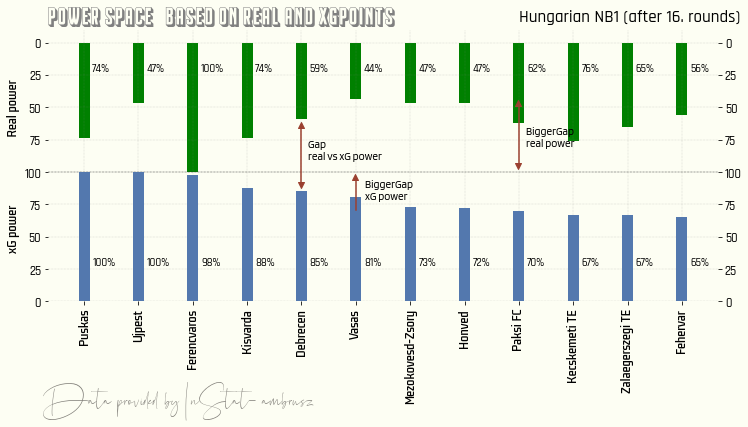

In [23]:
# set the figure and axes
fig,ax = plt.subplots(figsize=(12,5),facecolor='#fdfef3')

# set the colors
ax.set_facecolor('#fdfef3')
line_color = '#9b402f'

# draw a horizontal line in the middle of the plot - this will be 100%
plt.axhline(100,0,50,ls='-.',lw=0.3,color='k')

# slightly grid
ax.grid(ls='-.',lw=0.3,color='gray',zorder=0, alpha=0.5,which='both')

# remove the spins
orient = ['top','right','left','bottom']
for m in orient:
        ax.spines[m].set_visible(False)
        

#  e -> due to the distance between the columns 

e = 0

for s in range(len(df)):
    num = round(df.iloc[s].xG_perc*100)
    num2 = round(df.iloc[s].real_perc*100)
    
    # n1 -> height of the xG_perc columns
    # n2 -> height of the real_perc columns ()
    n1 = 200-(num+num2)+num
    n2 = 200
    
    plt.bar(e,num, color = '#5378ae',zorder=2)
    plt.annotate(f'{round(df.iloc[s].xG_perc*100)}%',(e+0.6,28))
    
    # trick - we use a color corresponding to the background for the gap (zorder=1)
    plt.bar(e,n1, color = '#fdfef3',zorder=1)
    
    plt.bar(e,n2, color = 'g',zorder=0)
    plt.annotate(f'{round(df.iloc[s].real_perc*100)}%',(e+0.6,178))

    e+=4

# annotate/interpreter -> we could also set this to automatic, but for the sake of aesthetics, we chose the best one
plt.annotate('Gap \nreal vs xG power', (16.5,110),fontfamily='Blinker')
plt.plot([16,16],[89,136],color=line_color)
plt.scatter(15.96,90,marker='v',color=line_color)
plt.scatter(15.96,136,marker='^',color=line_color)

plt.annotate('BiggerGap \nreal power', (32.5,120),fontfamily='Blinker')
plt.plot([32,32],[104,153],color=line_color)
plt.scatter(31.96,105,marker='v',color=line_color)
plt.scatter(31.96,153,marker='^',color=line_color)

plt.annotate('BiggerGap \nxG power', (20.7,79),fontfamily='Blinker')
plt.plot([20,20],[71,96],color=line_color)
plt.scatter(19.95,72,marker='v',color=line_color)
plt.scatter(19.95,96,marker='^',color=line_color)
plt.title('POWER SPACE - based on Real and xgPoints', loc='left',size=24, fontfamily = 'Franchise',color = 'gray')


# set ticks and texts
ax.set_yticklabels([0,25,50,75,100,75,50,25,0])
ax.set_xticks([x for x in range(0,48,4)])
ax.set_xticklabels([x for x in df.team], rotation=90, fontfamily='Kdam Thmor Pro')

ax.set_ylabel('xG power                          Real power',fontfamily='Kdam Thmor Pro')

ax.text(x = -3, y = -84,
        s = "Data provided by InStat- ambrusz" , fontfamily='Canonatia', fontstyle = 'italic',size= 40,color = '#817f79')

ax.text(x = 32, y = 216,
        s = "Hungarian NB1 (after 16. rounds)" , size= 17,color = 'k');

#plt.savefig(f'/Users/arpadambrusz/Desktop/powerSpace NB2.png', dpi=300, bbox_inches="tight");